In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the data
deliveries = pd.read_csv('/content/deliveries.csv')
matches = pd.read_csv('/content/matches.csv')

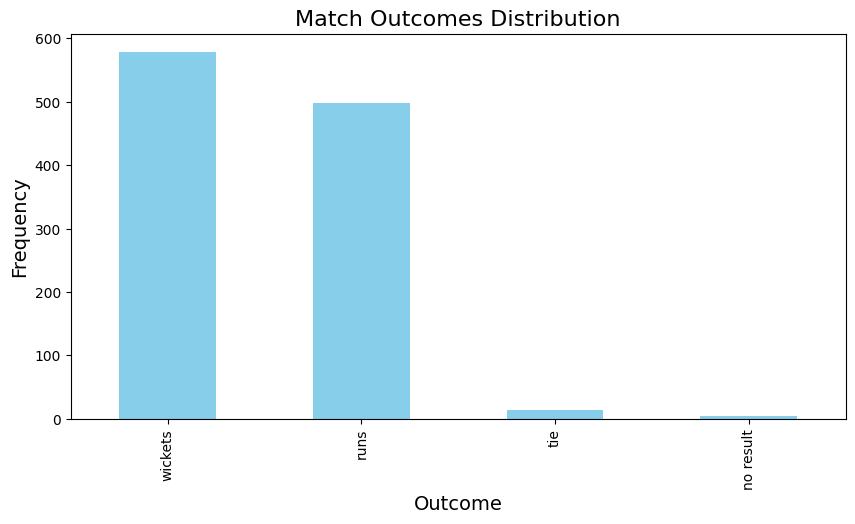

In [ ]:
# Feature 1: Match Outcome Analysis
# Visualize match outcomes across different years
match_outcomes = matches['result'].value_counts()
plt.figure(figsize=(10, 5))
match_outcomes.plot(kind='bar', color='skyblue')
plt.title('Match Outcomes Distribution', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

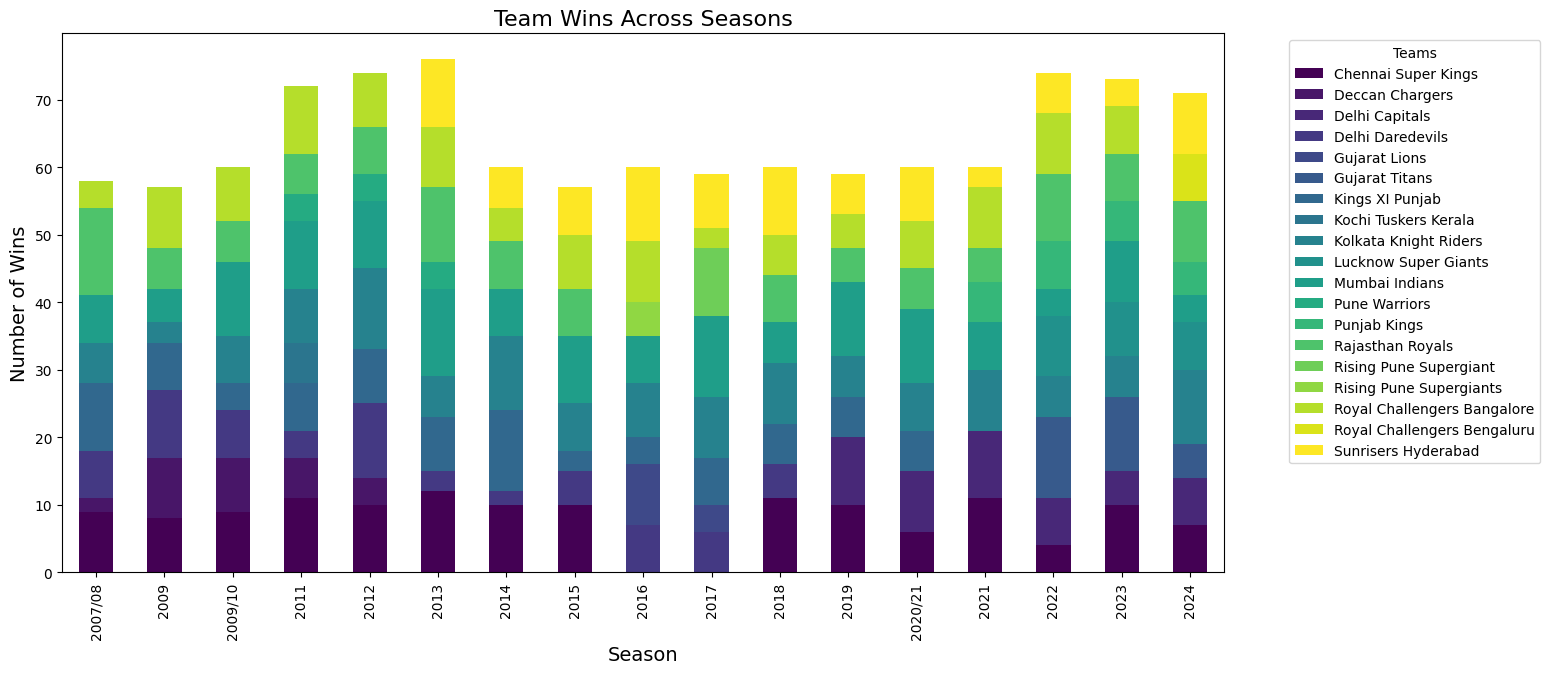

In [ ]:
# Analyze team performance based on historical data and seasonal trends
team_wins = matches.groupby(['season', 'winner']).size().unstack(fill_value=0)
team_wins.plot(kind='bar', stacked=True, figsize=(15, 7), cmap='viridis')
plt.title('Team Wins Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

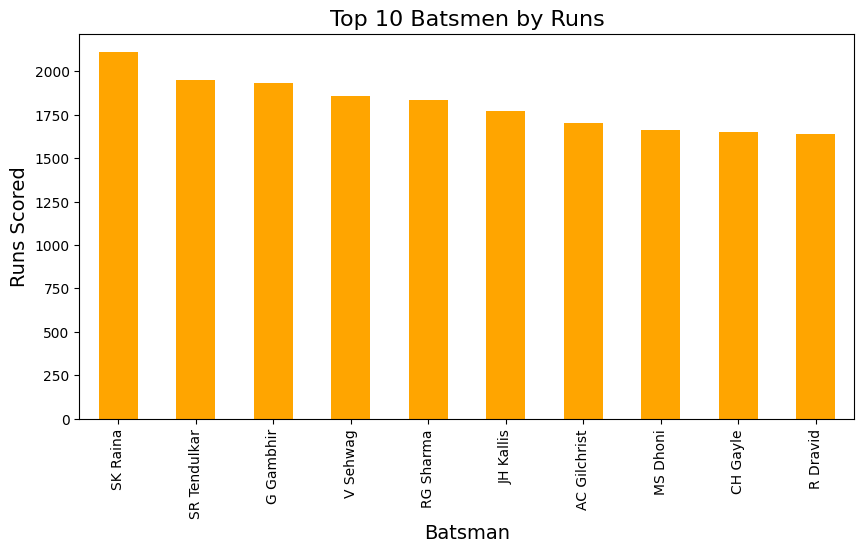

In [ ]:
# Feature 2: Player Performance
# Track individual player statistics like runs, wickets, and strike rates
player_runs = deliveries.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)
player_runs.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Top 10 Batsmen by Runs', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Runs Scored', fontsize=14)
plt.show()

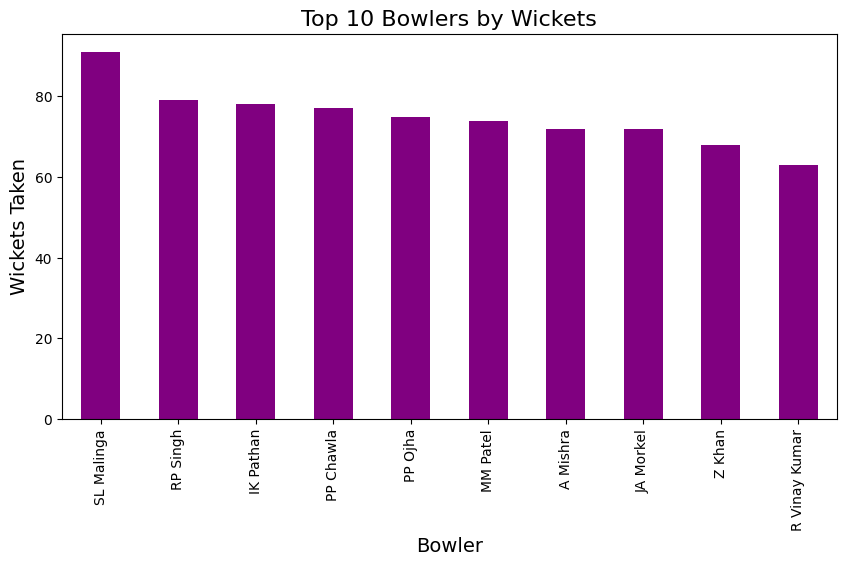

In [ ]:
player_wickets = deliveries[deliveries['dismissal_kind'].notnull()].groupby('bowler').size().sort_values(ascending=False).head(10)
player_wickets.plot(kind='bar', figsize=(10, 5), color='purple')
plt.title('Top 10 Bowlers by Wickets', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Wickets Taken', fontsize=14)
plt.show()

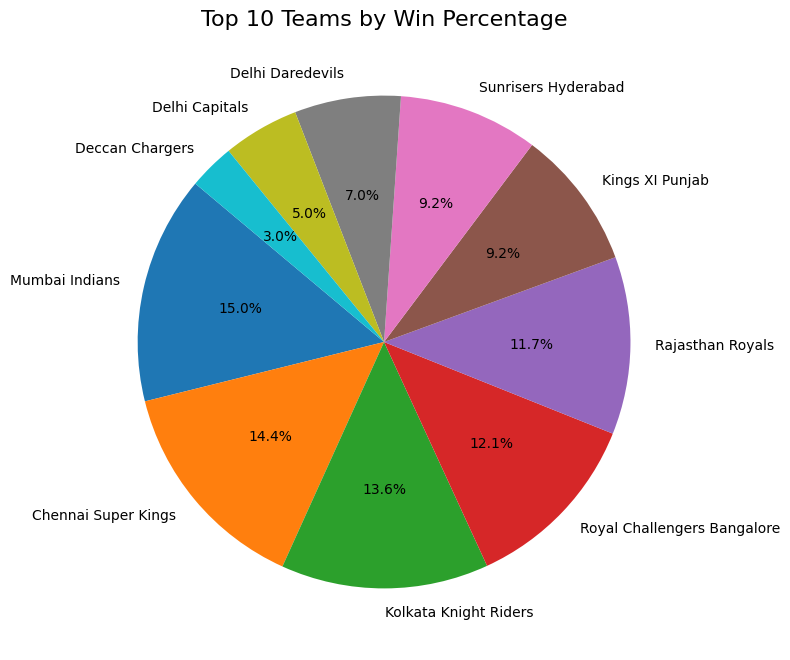

In [ ]:
# Feature 3: Team Comparison
# Compare team performance using pie charts for win percentage
team_wins_percentage = (matches['winner'].value_counts() / len(matches) * 100).head(10)
team_wins_percentage.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=140, cmap='tab10')
plt.title('Top 10 Teams by Win Percentage', fontsize=16)
plt.ylabel('')
plt.show()


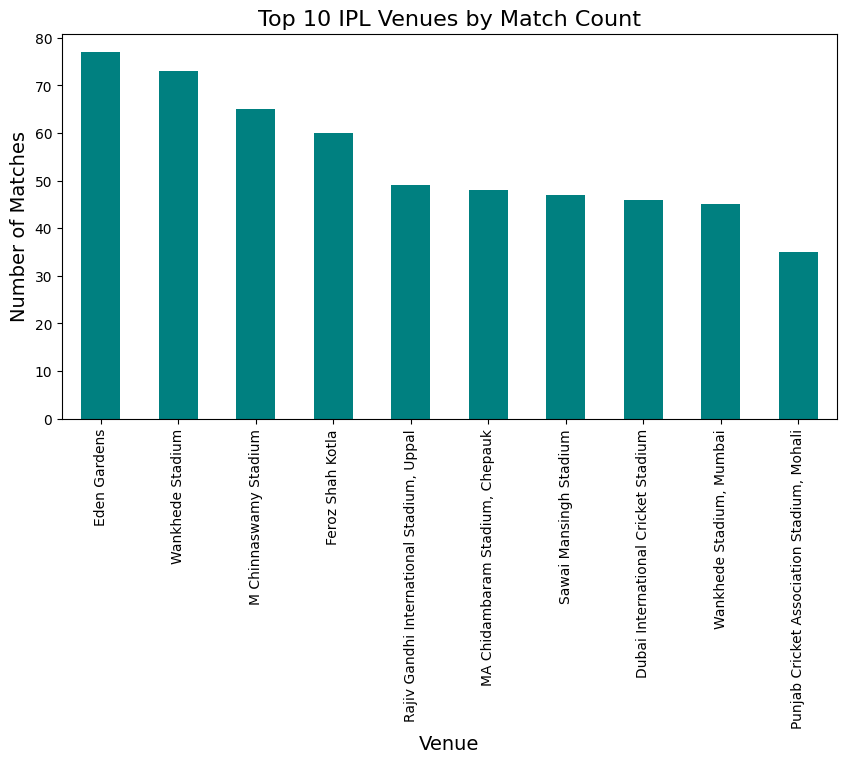

In [ ]:

# Feature 4: Venue Performance
# Evaluate match outcomes across different IPL venues
venue_performance = matches['venue'].value_counts().head(10)
venue_performance.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title('Top 10 IPL Venues by Match Count', fontsize=16)
plt.xlabel('Venue', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.show()

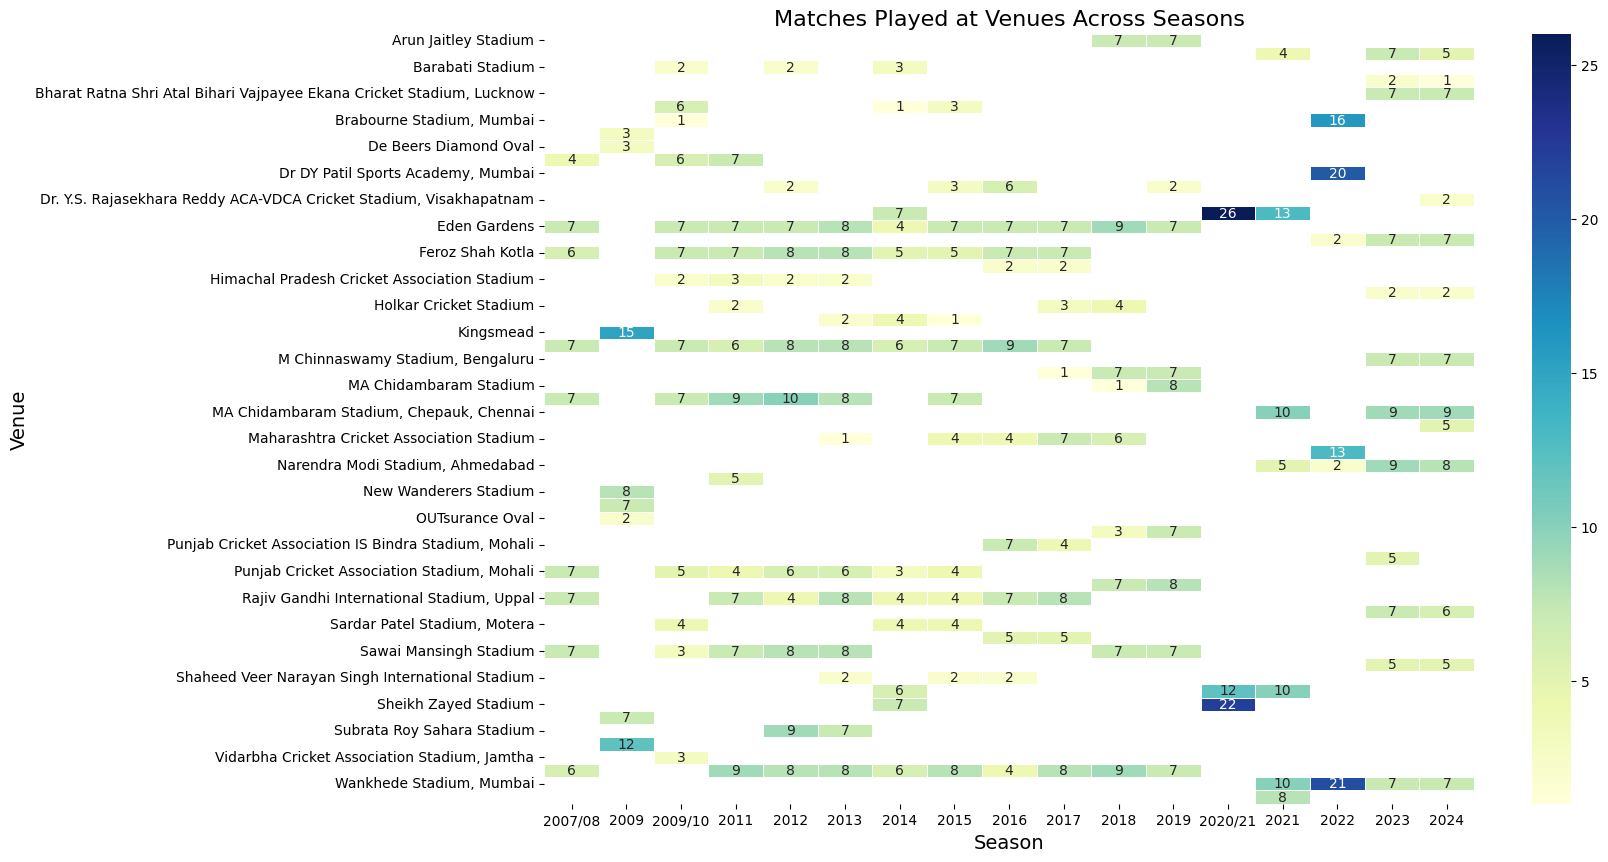

In [ ]:
# Present venue-based performance using heatmaps
venue_heatmap = matches.pivot_table(index='venue', columns='season', values='id', aggfunc='count')
plt.figure(figsize=(15, 10))
sns.heatmap(venue_heatmap, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Matches Played at Venues Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Venue', fontsize=14)
plt.show()

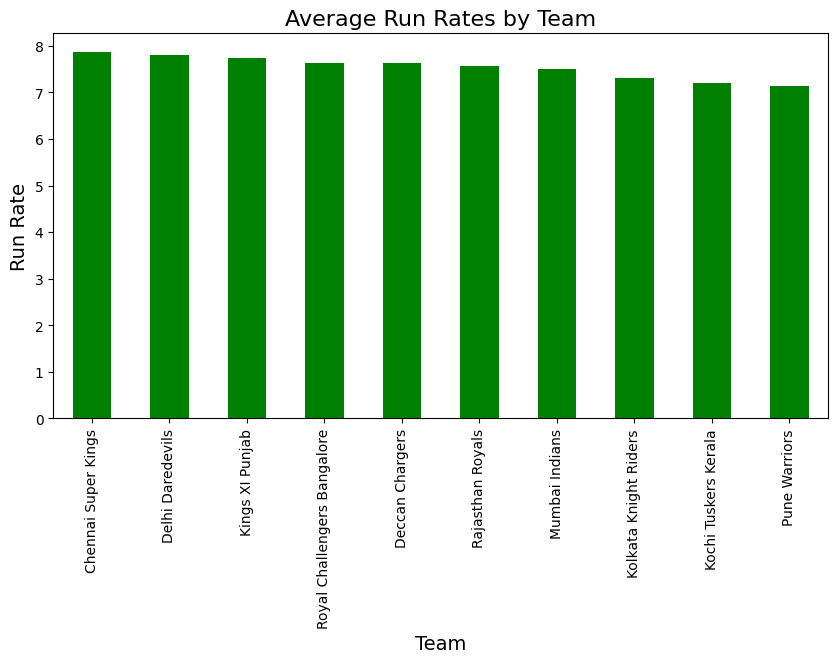

In [ ]:
# Feature 5: Run Rate & Scoring Analysis
# Visualize average run rates for different teams
team_runs = deliveries.groupby('batting_team')['total_runs'].sum()
team_balls = deliveries.groupby('batting_team').size()
team_run_rates = (team_runs / team_balls * 6).sort_values(ascending=False)
team_run_rates.plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Average Run Rates by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Run Rate', fontsize=14)
plt.show()

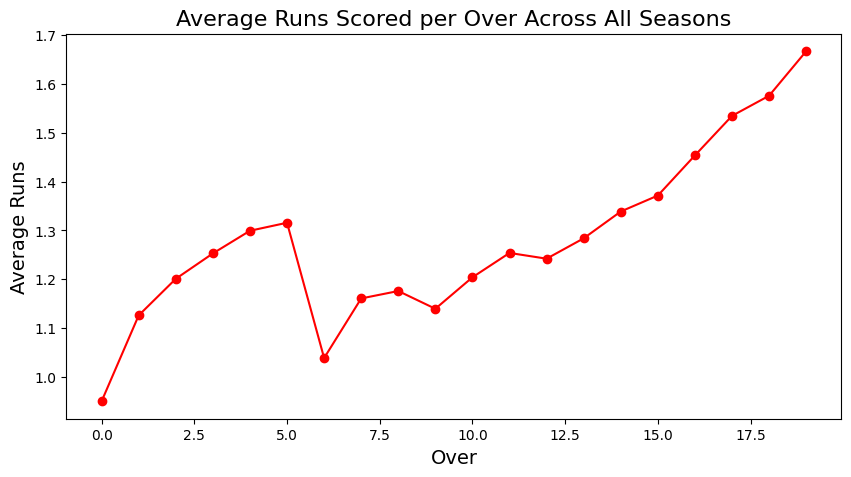

In [ ]:
# Use line graphs to track scoring trends over the years
scoring_trends = deliveries.groupby('over')['total_runs'].mean()
scoring_trends.plot(kind='line', figsize=(10, 5), marker='o', color='red')
plt.title('Average Runs Scored per Over Across All Seasons', fontsize=16)
plt.xlabel('Over', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.show()

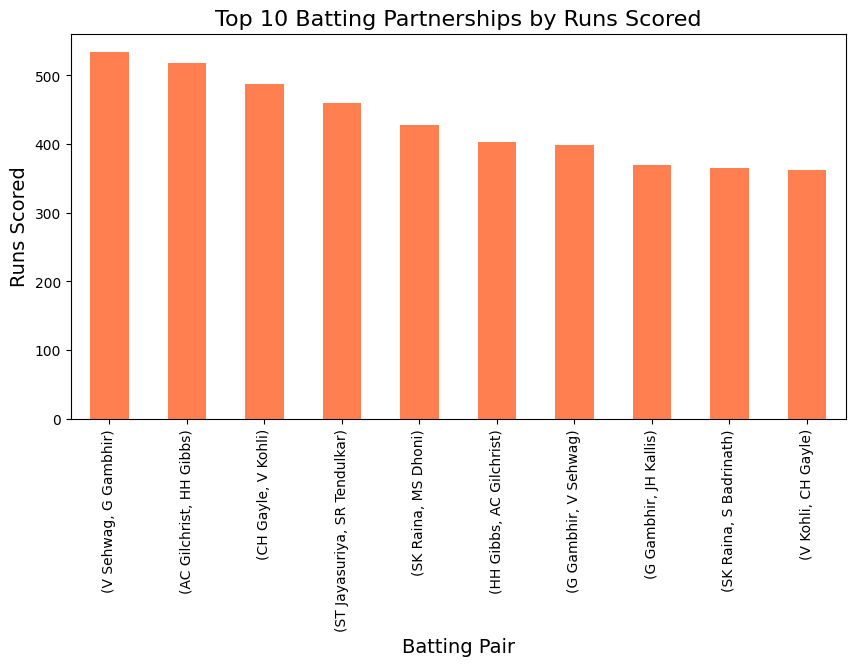

In [ ]:
# Feature 6: Best Batting Partnerships
# Identify and visualize top batting pairs
batting_pairs = deliveries.groupby(['batter', 'non_striker'])['total_runs'].sum().sort_values(ascending=False).head(10)
batting_pairs.plot(kind='bar', figsize=(10, 5), color='coral')
plt.title('Top 10 Batting Partnerships by Runs Scored', fontsize=16)
plt.xlabel('Batting Pair', fontsize=14)
plt.ylabel('Runs Scored', fontsize=14)
plt.show()
